X2 (150, 2)
svm-w: [ 0.02146152 -0.02436466]
svm-b: -1.113999999999988
Accuracy: 0.3
Precision: 0.09
Recall: 0.3
F1 Score: 0.13846153846153844


/home/jingchen/miniconda3/envs/clipood/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


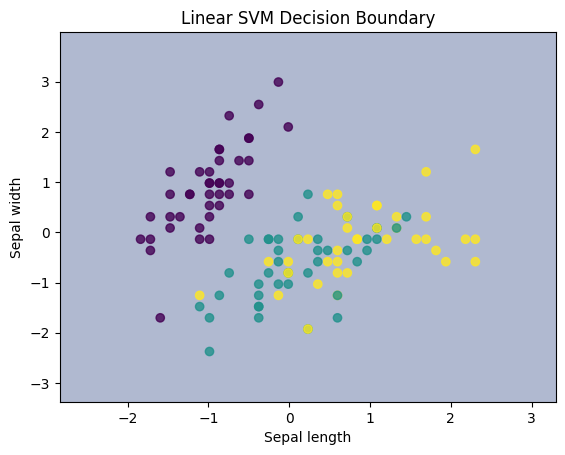

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zeros
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                condition = (y[idx] * (np.dot(x_i, self.w) - self.b) >= 1).all()
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Load dataset
iris = datasets.load_iris()
X = iris.data
# print('X', X)
y = iris.target
# print('y:', y)
# We'll use only the first two features for visualization
X = X[:, :2]
print('X2', X.shape)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
svm = LinearSVM()
svm.fit(X_train, y_train)
print('svm-w:', svm.w)
print('svm-b:', svm.b)
# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot decision boundary
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, svm)


Accuracy: 0.5666666666666667
Precision: 0.45606060606060606
Recall: 0.5666666666666667
F1 Score: 0.4704898446833931


/home/jingchen/miniconda3/envs/clipood/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


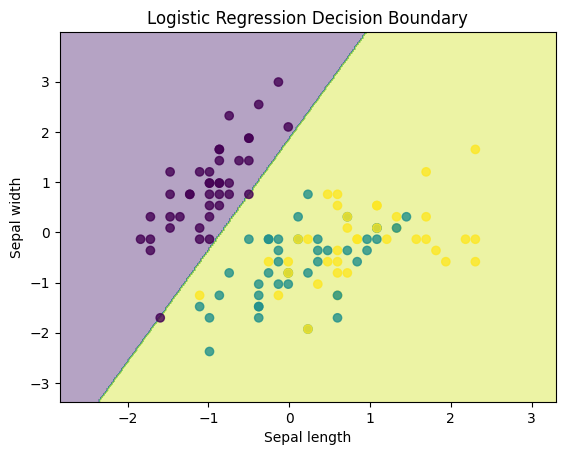

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initializes the LogisticRegression model.

        Parameters:
        - learning_rate (float): The step size at each iteration.
        - n_iterations (int): Number of iterations over the training dataset.

        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # To be initialized in fit method
        self.bias = None  # To be initialized in fit method

    def _sigmoid(self, z):
        """
        compute the sigmoid function.

        Parameters:
        - z (np.array): Linear combination of weights and features plus bias.

        Returns:
        - np.array: Sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X (np.array): Training features.
        - y (np.array): Target values.
        
        Returns:
        - self: The instance of the model.

        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent to update weights and bias
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        """
        Predict probability estimates for all classes.

        Parameters:
        - X (np.array): Test features.

        Returns:
        - np.array: Probability of the sample for each class in the model.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels for samples in X.

        Parameters:
        - X (np.array): Test features.
        - threshold (float): Threshold used to convert probabilities into binary output.

        Returns:
        - np.array: Predicted class label per sample.
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


# Load and preprocess dataset
iris = load_iris()
X = iris.data
y = iris.target

# We'll use only the first two features for visualization
X = X[:, :2]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(X_test)

# Calculate the metrics using scikit-learn
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting the decision boundary
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, logistic_regression)
